In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
labels = pd.DataFrame({'cat':['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
                       'label':[0,1,2,3,4,5,6,7,8,9]})

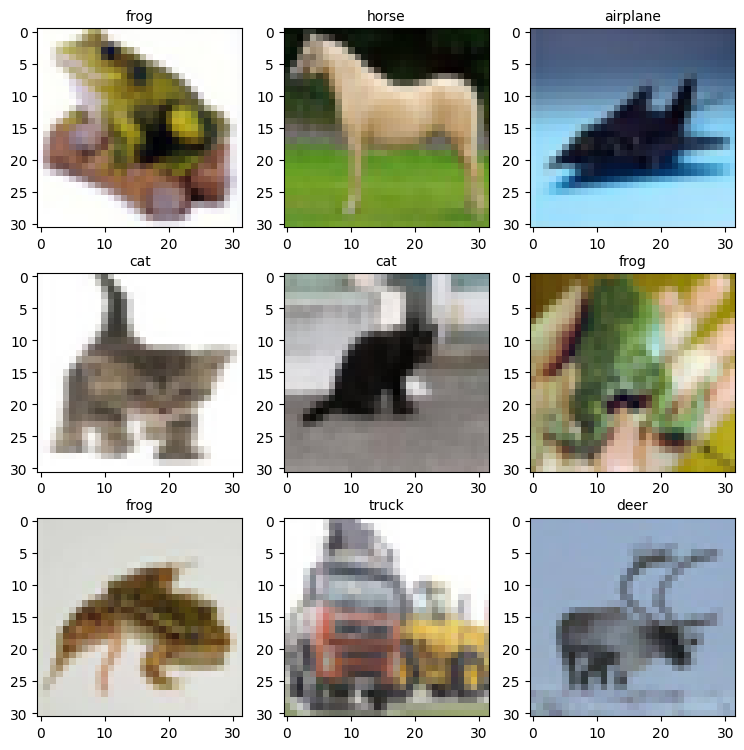

In [3]:
fig, axes = plt.subplots(3, 3, figsize = (9,9))
axes = axes.ravel()
n_train = len(x_train)


for i in np.arange(0,9):
    index = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index][0])
    axes[i].set_title(labels['cat'][label_index], fontsize = 10)

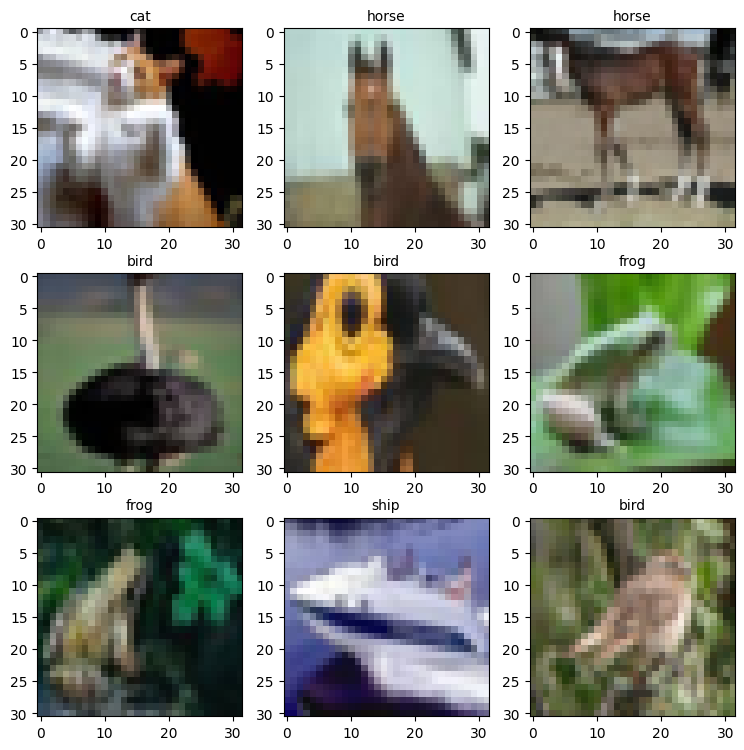

In [4]:
fig, axes = plt.subplots(3, 3, figsize = (9,9))
axes = axes.ravel()
n_train = len(x_test)


for i in np.arange(0,9):
    index = np.random.randint(0, len(x_test))
    axes[i].imshow(x_test[index,1:])
    label_index = int(y_test[index][0])
    axes[i].set_title(labels['cat'][label_index], fontsize = 10)

In [5]:
num_clas = len(labels['cat'])
num_clas

10

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=1)

In [7]:
from tensorflow.keras.utils import to_categorical

y_test_norm = to_categorical(y_test,num_clas)
y_train_norm = to_categorical(y_train,num_clas)
y_val_norm = to_categorical(y_val,num_clas)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.optimizers import Adam

model = Sequential()

## Capa de ingreso
model.add(Conv2D(64, (3,3), input_shape = (32,32,3), strides = (2,2), padding = ('same')))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((3,3), strides = (2,2), padding = ('same')))

## Primer Bloque (2A)
model.add(Conv2D(64, (3,3), strides = (1,1), padding = ('same')))
model.add(Activation('relu'))

## Segundo Bloque (2B)
model.add(Conv2D(64, (3,3), strides = (1,1), padding = ('same')))
model.add(Activation('relu'))

## Tercer Bloque (3A)
model.add(Conv2D(128, (3,3), strides = (2,2), padding = ('same')))
model.add(Conv2D(128, (1,1), strides = (2,2), padding = ('same')))
model.add(Activation('relu'))

## Cuarto Bloque (3B)
model.add(Conv2D(128, (3,3), strides = (1,1), padding = ('same')))
model.add(Activation('relu'))

## Quinto Bloque (4A)
model.add(Conv2D(256, (3,3), strides = (2,2), padding = ('same')))
model.add(Conv2D(256, (1,1), strides = (2,2), padding = ('same')))
model.add(Activation('relu'))

## Sexto Bloque (4B)
model.add(Conv2D(256, (3,3), strides = (1,1), padding = ('same')))
model.add(Activation('relu'))

## Septimo Bloque (5A)
model.add(Conv2D(512, (3,3), strides = (2,2), padding = ('same')))
model.add(Conv2D(512, (1,1), strides = (2,2), padding = ('same')))
model.add(Activation('relu'))

## Octavo Bloque (5B)
model.add(Conv2D(512, (3,3), strides = (1,1), padding = ('same')))
model.add(Activation('relu'))

## Capa de Pooling
model.add(AveragePooling2D((7,7), strides = (7,7), padding = ('same')))

## Aplanado
model.add(Flatten())

## Capa de Respuesta
model.add(Dense(num_clas, activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=categorical_crossentropy,
              metrics=[categorical_accuracy])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

ea = EarlyStopping(monitor = 'val_categorical_accuracy',
                   patience = 5,
                   restore_best_weights=True)

In [ ]:
muestra = len(y_train)
batch = 32

his = model.fit(x_train, y_train_norm,
          batch_size = batch,
          steps_per_epoch = muestra//batch,
          epochs = 20,
          callbacks = [ea],
          validation_data = (x_val,y_val_norm))

Epoch 1/20
1250/1250 [==============================] - 523s 417ms/step - loss: 1.7477 - categorical_accuracy: 0.3048 - val_loss: 1.5413 - val_categorical_accuracy: 0.4069
Epoch 2/20
1250/1250 [==============================] - 518s 414ms/step - loss: 1.4127 - categorical_accuracy: 0.4692 - val_loss: 1.3026 - val_categorical_accuracy: 0.5151
Epoch 3/20
1250/1250 [==============================] - 513s 410ms/step - loss: 1.2087 - categorical_accuracy: 0.5596 - val_loss: 1.1995 - val_categorical_accuracy: 0.5638
Epoch 4/20
1250/1250 [==============================] - 514s 411ms/step - loss: 1.0842 - categorical_accuracy: 0.6091 - val_loss: 1.1188 - val_categorical_accuracy: 0.5970
Epoch 5/20
1250/1250 [==============================] - 513s 410ms/step - loss: 0.9884 - categorical_accuracy: 0.6462 - val_loss: 1.0897 - val_categorical_accuracy: 0.6246
Epoch 6/20
1250/1250 [==============================] - 514s 411ms/step - loss: 0.9036 - categorical_accuracy: 0.6792 - val_loss: 1.0615 - v

In [ ]:
model.summary()

In [ ]:
plt.plot(his.history['loss'],label='train_loss')
plt.plot(his.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
plt.plot(his.history['categorical_accuracy'],label='categorical_accuracy')
plt.plot(his.history['val_categorical_accuracy'],label='categorical_accuracy')
plt.legend()

In [ ]:
aa = model.predict(x_test)

In [ ]:
model.save('model.h5')